## Basics and K Nearest Neighbors (KNN) Algorithm

## Dataset
    
- This dataset is from UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/186/wine+quality

- white wine quality classification

- Number of data samples: 4898
    
- Each data sample has 12 numeric features/attributes.

- The first 11 are features, the 12th is labels    


In [ ]:
# Task 1.1 Load Data
import pandas as pd
import numpy as np
# ------------------ Add your code here -------------------
# df = pd.read_csv('winequality-white.csv')
df = pd.read_csv('winequality-white.csv', delimiter=';')

features = df.iloc[:, :11].values
target = df.iloc[:, -1].values

print("Feature:")
print(features)
print("\nLabel:")
print(target)
print("\nFeature Shape:")
print(features.shape)



Feature:
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]

Label:
[6 6 6 ... 6 7 6]

Feature Shape:
(4898, 11)


In [ ]:
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

class MyKNN:

    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        pred = np.zeros(X.shape[0], dtype=int)

        # Iterate through each sample
        for i in range(X.shape[0]):
            nns = self.findKNgbs(X[i, :])
            labels = self.y_train[nns]
            cnts = np.bincount(labels)
            pred[i] = np.argmax(cnts)

        return pred

    def findKNgbs(self, x):
        dist = np.sqrt(np.sum((self.X_train - x)**2, axis=1))

        indices = np.argsort(dist)[:self.k]
        return indices

    def accuracy(self, real, pred):
        return np.mean(real == pred)



### Finding the best hyperparameter (K) in KNN.  

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('winequality-white.csv', delimiter=';')
X = df.iloc[:, :11].values
y = df.iloc[:, -1].values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of samples in training + validation set: {X_train_val.shape[0]}")
print(f"Number of samples in test set: {X_test.shape[0]}")

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)


print(f"Number of samples in training set: {X_train.shape[0]}")
print(f"Number of samples in validation set: {X_val.shape[0]}")
print(f"Number of samples in test set: {X_test.shape[0]}")

Number of samples in training + validation set: 3918
Number of samples in test set: 980
Number of samples in training set: 3428
Number of samples in validation set: 490
Number of samples in test set: 980


In [ ]:
# hyperparameter selection

k_values = range(1, 11)
validation_accuracies = []

for k in k_values:
    knn = MyKNN(k=k)
    knn.fit(X_train, y_train)
    pred_val = knn.predict(X_val)
    accuracy = knn.accuracy(y_val, pred_val)
    validation_accuracies.append(accuracy)
    print(f"k = {k}: Accuracy = {accuracy:.2f}")

k = 1: Accuracy = 0.58
k = 2: Accuracy = 0.54
k = 3: Accuracy = 0.52
k = 4: Accuracy = 0.50
k = 5: Accuracy = 0.50
k = 6: Accuracy = 0.49
k = 7: Accuracy = 0.50
k = 8: Accuracy = 0.49
k = 9: Accuracy = 0.49
k = 10: Accuracy = 0.48


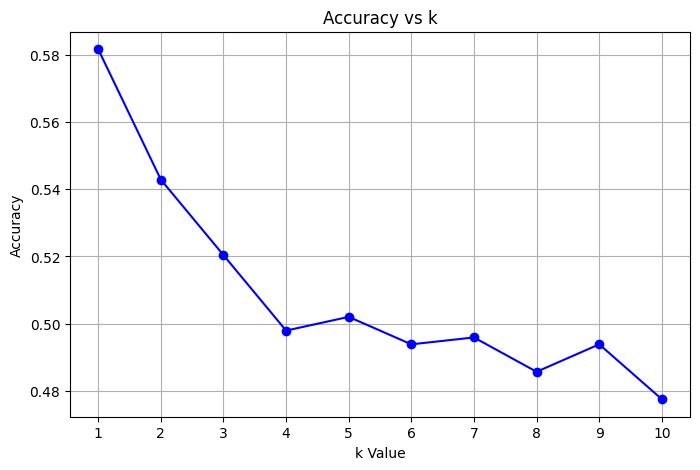

In [ ]:
# Plot accuracy using different K values

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, validation_accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs k')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
# Ensure x-axis shows only the integer k values
plt.xticks(k_values)
plt.grid()
plt.show()



### the Final Performance of KNN model


In [ ]:
from sklearn.metrics import confusion_matrix

best_k = k_values[np.argmax(validation_accuracies)]
print(f"Best k value based on validation set: {best_k}")

# Train the model on Training + Validation Set with the best k
knn_final = MyKNN(k=best_k)
knn_final.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)))

# predictions on the test set
test_pred = knn_final.predict(X_test)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Best k value based on validation set: 1
Confusion Matrix:
[[  1   0   2   1   1   0]
 [  1   6  10   6   2   0]
 [  1  11 164  95  18   2]
 [  1   7  80 277  55  12]
 [  0   5  21  55 102   9]
 [  0   0   1  10   7  17]]


In [ ]:
# Recall Rate for each class
# compute the recall rates using only my own functions

print("\nRecall Rate for each class:")
num_classes = conf_matrix.shape[0]
for class_idx in range(num_classes):
    true_positives = conf_matrix[class_idx, class_idx]
    false_negatives = sum(conf_matrix[class_idx, :]) - true_positives
    recall_rate = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    print(f"Class {class_idx}: Recall = {recall_rate}")


Recall Rate for each class:
Class 0: Recall = 0.2
Class 1: Recall = 0.24
Class 2: Recall = 0.563573883161512
Class 3: Recall = 0.6412037037037037
Class 4: Recall = 0.53125
Class 5: Recall = 0.4857142857142857


### the influence of using different numbers of features



In [ ]:

cases = {
    "First Feature": X_train[:, 0:1],
    "First 5 Features": X_train[:, 0:5],
    "First 10 Features": X_train[:, 0:10],
    "All 11 Features": X_train
}

validation_cases = {
    "First Feature": X_val[:, 0:1],
    "First 5 Features": X_val[:, 0:5],
    "First 10 Features": X_val[:, 0:10],
    "All 11 Features": X_val
}

accuracies = []

for case_name, X_train_case in cases.items():
    X_val_case = validation_cases[case_name]
    knn = MyKNN(k=1)
    knn.fit(X_train_case, y_train)
    pred_val = knn.predict(X_val_case)
    accuracy = knn.accuracy(y_val, pred_val)
    accuracies.append(accuracy)
    print(f"Accuracy for using {case_name.lower()}: {accuracy}")




Accuracy for using first feature: 0.2836734693877551
Accuracy for using first 5 features: 0.5775510204081633
Accuracy for using first 10 features: 0.5938775510204082
Accuracy for using all 11 features: 0.5816326530612245


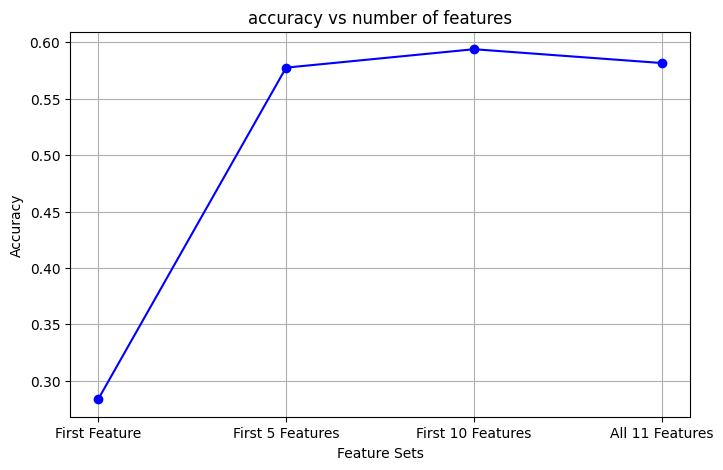

In [ ]:
# plot accuracies

plt.figure(figsize=(8, 5))
x_labels = ["First Feature", "First 5 Features", "First 10 Features", "All 11 Features"]
plt.plot(x_labels, accuracies, marker='o', linestyle='-', color='b')
plt.title('accuracy vs number of features')
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.grid()
plt.show()